# Вариант 2

В качестве корпуса, который я решила использовать для анализа экспрессивов, я использовала  [корпус imdb](http://ai.stanford.edu/~amaas/data/sentiment/index.html). Я выбрала экспрессив unbelievable.

In [171]:
import pandas as pd
import os
import re
from nltk.tokenize import word_tokenize
#tknzr = TweetTokenizer()
import matplotlib.pyplot as plt
import scipy.stats as stats

In [172]:
path = "/Users/Светлана/imdb/aclImdb/train"
dir_list = os.listdir(path)

In [173]:
mark = []
text = []
token = []
def read_and_process(path, mark, text):
    dir_list = os.listdir(path)
    for file in dir_list:
        with  open(path+'/'+file, encoding="utf8") as f:
            contents = f.read()
            tokens = word_tokenize(contents)
            token.append(tokens)
            m = file.split('_')[-1].split('.')[0]
            mark.append(m)
            text.append(contents.lower())
read_and_process(path+"/neg", mark, text)
read_and_process(path+"/pos", mark, text)

In [174]:
#Возьмем имеющиеся данные, создадим из них датасет
df = pd.DataFrame(list(zip(text, mark, token)), columns = ['text', 'mark', 'token'])
df.head()

,text,mark,token
0,story of a man who has unnatural feelings for ...,3,"[Story, of, a, man, who, has, unnatural, feeli..."
1,airport '77 starts as a brand new luxury 747 p...,4,"[Airport, '77, starts, as, a, brand, new, luxu..."
2,this film lacked something i couldn't put my f...,4,"[This, film, lacked, something, I, could, n't,..."
3,"sorry everyone,,, i know this is supposed to b...",1,"[Sorry, everyone, ,, ,, ,, I, know, this, is, ..."
4,when i was little my parents took me along to ...,1,"[When, I, was, little, my, parents, took, me, ..."


In [183]:
expressive = 'unbelievable'
marks = [i for i in range (1, 11)]

In [180]:
#подкорпус отзывов, в которых используется экспрессив
expr_df = df[df.text.str.contains(expressive)][['text','mark']]
expr_df.head(10)

,text,mark
62,so...we get so see added footage of brando...i...,2
85,"well, at least my theater group did, lol. so o...",2
91,i laughed all the way through this rotten movi...,4
142,he was my hero for all time until he went alon...,1
165,i can't believe that steven segal's career has...,1
189,the championship game is only a couple of days...,2
314,"i hate to sound like an 'old person', but fran...",1
338,"here, let me wave my hands over the keyboard, ...",1
379,i rented this movie from the library (it's har...,1
380,jameson parker and marilyn hassett are the scr...,2


In [176]:

def count_labels (i, countR, countX, index):
    if str(i.mark) == str(index):
        countR += len([x for x in i.token if len(x) == len('unbelievable') and x != 'unbelievable'])
        countX += len(re.findall(r'unbelievable', i.text))
    return countX, countR

In [187]:

log_odds = []
x_R = 0
x_X = 0
for index in range(1, 11):
    for j in expr_df.index.tolist():
        i = df.loc[j]
        if str(i.mark) == str(index):
            x_R += len([x for x in i.token if len(x) == len(expressive) and x != expressive])
            x_X += len(re.findall(expressive, i.text))
    log_odds.append(np.log(x_X/(x_R - x_X)))

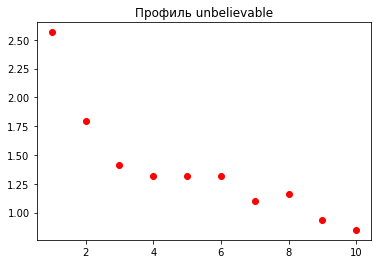

In [233]:
plt.title('Профиль unbelievable')
plt.plot(marks, log_odds,'ro')
plt.show()

In [193]:
X = np.array(marks)
y = np.array(log_odds)

In [229]:
# для линейной регрессии
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(np.array(marks).reshape(-1, 1), np.array(log_odds).reshape(-1, 1))
y_pred = slr.predict(np.array(marks).reshape(-1, 1))
res =  slr.score(np.array(marks).reshape(-1, 1, ), np.array(log_odds).reshape(-1, 1))
print("Значение R² для линейной регрессии",res)

Значение R² для линейной регрессии 0.7530518935497292


In [230]:
# для квадратичной регрессии 
from sklearn.metrics import r2_score
coeffs = np.polyfit(X, y, 2)
p = np.poly1d(coeffs)
print("Значение R² для квадратичной регрессии",r2_score(p(X), y))

Значение R² для квадратичной регрессии 0.8397689738930556


как видно, квадратичная регрессия подходит для данных лучше

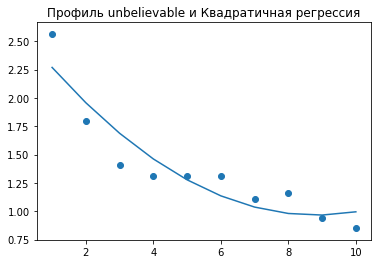

In [232]:
plt.title('Профиль unbelievable и Квадратичная регрессия')
plt.scatter(X, y)
plt.plot(marks, p(X))
plt.show()

In [236]:
expr_df.loc[91].text

'i laughed all the way through this rotten movie. it\'s so unbelievable. a woman leaves her husband after many years of marriage, has a breakdown in front of a real estate office. what happens? the office manager comes outside and offers her a job!!! hilarious! next thing you know the two women are going at it. yep, they\'re lesbians! nothing rings true in this "lifetime for women with nothing better to do" movie. clunky dialogue like "i don\'t want to spend the rest of my life feeling like i had a chance to be happy and didn\'t take it" doesn\'t help. there\'s a wealthy, distant mother who disapproves of her daughter\'s new relationship. a sassy black maid - unbelievable that in the year 2003, a film gets made in which there\'s a sassy black maid. hattie mcdaniel must be turning in her grave. the woman has a husband who freaks out and wants custody of the snotty teenage kids. sheesh! no cliche is left unturned.'

In [238]:
expr_df.loc[23736].text

'what an extraordinary crime thriller!! my wife and i saw this at the toronto international film festival last week and it was far and away the best movie in an exceptionally strong festival. it\'s already my second favourite film of all-time after dr. strangelove and i was definitely on an emotional high as i walked home and discussed the film with my wife.<br /><br />i don\'t want to spoil the plot because thrillers of this calibre are best enjoyed without preconceptions. a synopsis that i\'d feel comfortable sharing is that two brothers, played by phillip seymour hoffman and ethan hawke, are planning to rob a jewellery store in westchester, new york. the film bounces back and forth in time over approximately a two week period of time (before, during and after the robbery), and one key scene is repeated at least three times. ordinarily, that could disrupt the momentum of a film but that never happens during this masterpiece. the excitement, the tension, and even the quality of the ac

In [ ]:
expr_df.loc[91].text

У нас получился перевернутый J-образный профиль, выше примеры. Это совпало с моей гипотезой. Интересно, что даже в положительно оцененных отзывах, unbelievable преимущественно используется в негативном ключе